## Сегерлинд Л., задача на стр. 235

In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def splitBorder(nodes, splits, closed=False):
    N = nodes.shape[0]-1
    if type(splits) == int:
        splits = [splits]*N
    if len(splits) < N:
        return None
    n = sum(splits[:N])
    if not closed:
        n += 1
    res = np.empty((n, 2))
    if not closed:
        res[-1]=nodes[-1]
    s = 0
    for i in range(N):
        res[s:s+splits[i], 0] = \
        np.linspace(nodes[i,0], nodes[i+1,0], splits[i]+1)[:-1]
        res[s:s+splits[i], 1] = \
        np.linspace(nodes[i,1], nodes[i+1,1], splits[i]+1)[:-1]
        s += splits[i]
    return res

In [3]:
def splitArc(c, r, splits, angles=(0,90)):
    alpha = np.radians(np.linspace(angles[0], angles[1], splits))
    return np.vstack((r*np.cos(alpha)+c[0], r*np.sin(alpha)+c[1])).T

In [4]:
L1, L2, H, h, R = 10., 10., 4., 2., 2.

In [5]:
pts = np.array([[L1, H],
                [0., H],
                [0., 0.],
                [L1+R+L2, 0.],
                [L1+R+L2, h],
                [L1+R, h]
               ])
splits = [15, 10, 30, 5, 15]

In [6]:
brd = splitBorder(pts, splits, closed=True)

In [7]:
arc = splitArc((L1+R, H), R, 10, angles=(270, 180))[:-1]

(-1.1, 23.1, -0.2, 4.2)

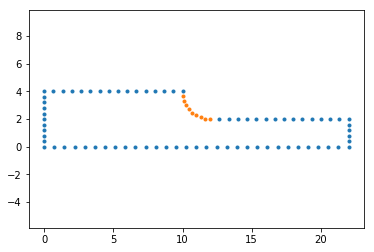

In [8]:
plt.plot(brd[:,0], brd[:,1], '.')
plt.plot(arc[:,0], arc[:,1], '.')
plt.axis('equal')

In [9]:
Nodes = np.vstack((brd, arc))

((10, 30), (10, 30))

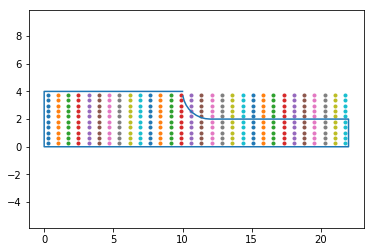

In [10]:
L = L1+R+L2
delta = 0.25

ll = np.linspace(delta, L-delta, 30)
hh = np.linspace(delta, H-delta, 10)

X, Y = np.meshgrid(ll, hh)
plt.plot(X, Y, '.')
plt.plot(Nodes[:,0], Nodes[:,1])
plt.axis('equal')
X.shape, Y.shape

In [11]:
inner = np.vstack((X.ravel(), Y.ravel())).T
inner.shape

(300, 2)

In [12]:
delta2 = 0.25

In [13]:
mask1 = np.sum((inner - np.array([L1+R, H]))**2, axis=1) > (R+delta2)**2

In [14]:
mask2 = np.logical_not((inner[:,0] > L1+R) & (inner[:,1] > h))

In [15]:
inner = inner[mask1 & mask2]
inner.shape

(218, 2)

(-1.1, 23.1, -0.2, 4.2)

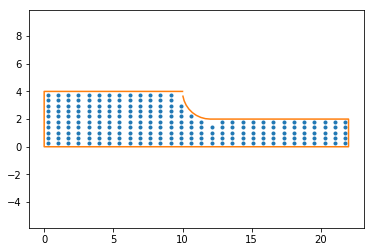

In [16]:
plt.plot(inner[:,0], inner[:,1], '.')
plt.plot(Nodes[:,0], Nodes[:,1])
plt.axis('equal')

In [17]:
import scipy.spatial

In [18]:
Nodes = np.vstack((Nodes, inner))

In [19]:
tri = scipy.spatial.Delaunay(Nodes)

In [20]:
Elems = tri.simplices.copy()
Elems.shape

(541, 3)

(-1.1, 23.1, -0.2, 4.2)

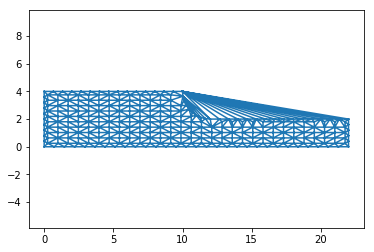

In [21]:
plt.triplot(Nodes[:,0], Nodes[:,1], Elems)
plt.axis('equal')

In [22]:
Coords = Nodes[Elems]
e_centers = np.mean(Coords, axis=1)
e_centers.shape

(541, 2)

(-1.1, 23.1, -0.2, 4.2)

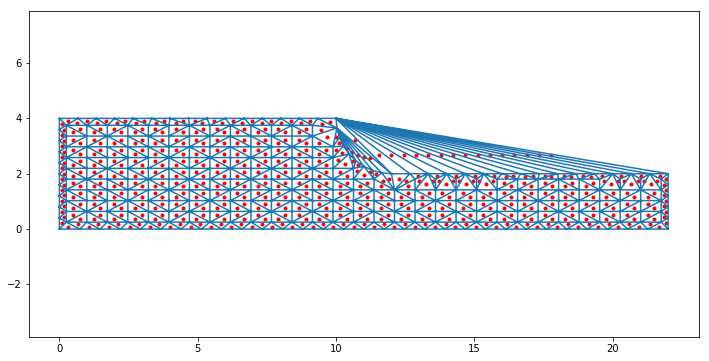

In [23]:
plt.figure(figsize=(12, 6))
plt.triplot(Nodes[:,0], Nodes[:,1], Elems)
plt.scatter(e_centers[:,0], e_centers[:,1], marker='.', color='r')
plt.axis('equal')

In [24]:
mask1 = np.sum((e_centers - np.array([L1+R, H]))**2, axis=1) > (R)**2

In [25]:
mask2 = np.logical_not((e_centers[:,0] > L1+R) & (e_centers[:,1] > h))

In [26]:
Elems = Elems[mask1 & mask2]

(-1.1, 23.1, -0.2, 4.2)

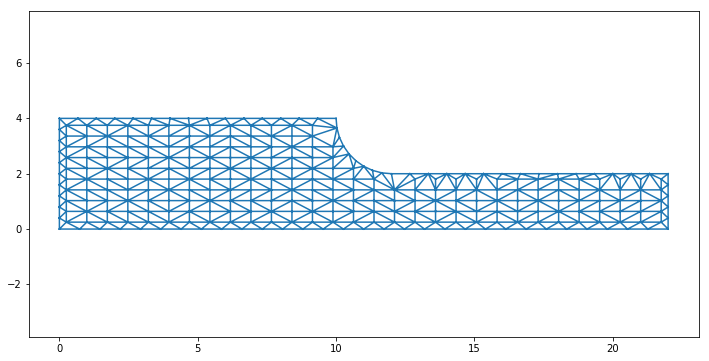

In [27]:
plt.figure(figsize=(12, 6))
plt.triplot(Nodes[:,0], Nodes[:,1], Elems)
#plt.scatter(e_centers[:,0], e_centers[:,1], marker='.', color='r')
plt.axis('equal')

In [28]:
def triarea(a, b, c):
    ab = b - a
    ac = c - a
    return 0.5 * (ab[:,0]*ac[:,1]-ab[:,1]*ac[:,0])

In [29]:
Coords = Nodes[Elems]
A = triarea(Coords[:,0], Coords[:,1], Coords[:,2])
A.shape

(518,)

In [30]:
np.sum(A)

64.87433280199525

In [31]:
# b = Nodes[[1,2,0], 1] - Nodes[[2,0,1],1]

b = Coords[:,[1,2,0],1] - Coords[:,[2,0,1],1]
b

array([[-0.38888889,  0.19444444,  0.19444444],
       [-0.19444444, -0.20555556,  0.4       ],
       [ 0.17222222, -0.38888889,  0.21666667],
       ...,
       [-0.38888889,  0.38888889,  0.        ],
       [ 0.38888889, -0.38888889,  0.        ],
       [ 0.38888889,  0.        , -0.38888889]])

In [32]:
# c = Nodes[[2,0,1], 0] - Nodes[[1,2,0],0]

c = Coords[:,[2,0,1],0] - Coords[:,[1,2,0],0]
c

array([[ 0.        , -0.25      ,  0.25      ],
       [ 0.25      , -0.25      ,  0.        ],
       [ 0.25      ,  0.        , -0.25      ],
       ...,
       [-0.74137931,  0.        ,  0.74137931],
       [ 0.        ,  0.74137931, -0.74137931],
       [-0.74137931,  0.74137931,  0.        ]])

In [33]:
coef = 1 / (2*A)
coef.shape

(518,)

In [34]:
z = np.zeros_like(b[:,0])


#B1 = np.array([b[0], 0, b[1], 0, b[2], 0])
B1 = np.stack((b[:,0], z, b[:,1], z, b[:,2], z), axis=1)
B2 = np.stack((z, c[:,0], z, c[:,1], z, c[:,2]), axis=1)
B3 = np.stack((c[:,0], b[:,0], c[:,1], b[:,1], c[:,2], b[:,2]), axis=1)

B = np.stack((B1, B2, B3), axis=1)*coef.reshape(-1, 1, 1)
B.shape

(518, 3, 6)

In [35]:
E = 2e7 # Н/см^2
mu = 0.25
t = 0.5 # см
P = 44e3 # Н/см^2

In [36]:
D = E/(1-mu**2)*np.array([[1,mu,0],[mu,1,0],[0,0,0.5*(1-mu)]])
D

array([[21333333.33333333,  5333333.33333333,        0.        ],
       [ 5333333.33333333, 21333333.33333333,        0.        ],
       [       0.        ,        0.        ,  8000000.        ]])

In [37]:
BT = np.transpose(B, axes=(0,2,1))
BT.shape

(518, 6, 3)

In [38]:
Ke = np.matmul(np.matmul(BT, D), B)*t*A.reshape(-1, 1, 1)
Ke.shape

(518, 6, 6)

In [39]:
coef = t * A
Ke = np.matmul(np.matmul(BT, D),B)*coef.reshape(-1,1,1)
Ke.shape

(518, 6, 6)

In [40]:
# i,j,k -> i,i,j,j,k,k

In [41]:
Elems

array([[ 20, 204, 233],
       [ 19,  20, 233],
       [174,  22, 144],
       ...,
       [184, 185, 214],
       [185, 184, 154],
       [155, 185, 154]], dtype=int32)

In [42]:
EFT = 2*Elems[:, [0, 0, 1, 1, 2, 2]] + np.array([0, 1, 0, 1, 0, 1])
EFT

array([[ 40,  41, 408, 409, 466, 467],
       [ 38,  39,  40,  41, 466, 467],
       [348, 349,  44,  45, 288, 289],
       ...,
       [368, 369, 370, 371, 428, 429],
       [370, 371, 368, 369, 308, 309],
       [310, 311, 370, 371, 308, 309]])

In [43]:
Nn = Nodes.shape[0]
Nn

302

In [44]:
EFT[0]

array([ 40,  41, 408, 409, 466, 467])

In [45]:
K = np.zeros((Nn*2, Nn*2))
for i in range(Elems.shape[0]):
    EFTe = EFT[i].reshape(1, -1)
    K[EFTe.T, EFTe] += Ke[i]

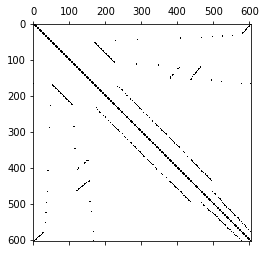

In [46]:
plt.spy(K)

(-1.1, 23.1, -0.2, 4.2)

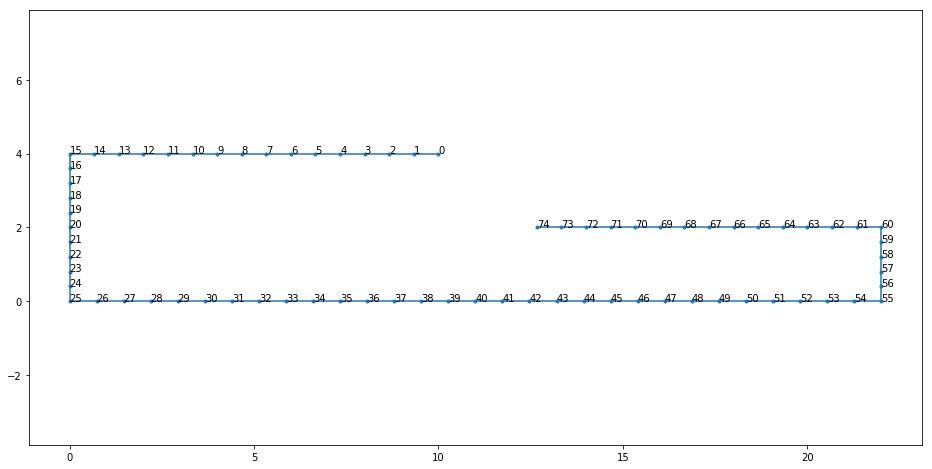

In [47]:
plt.figure(figsize=(16,8))
plt.plot(brd[:,0], brd[:,1], '.-')
for ni, n in enumerate(brd):
    plt.text(n[0], n[1], '%d' % ni, fontsize=10)
plt.axis('equal')

In [48]:
F = np.zeros(Nn*2)

In [49]:
# номера степеней свободы на правой границе 
# (где приложено распределенное усилие p) 
bc_p = np.argwhere(np.abs(Nodes[:,0]-L)<1e-5).ravel()
bc_p

array([55, 56, 57, 58, 59, 60], dtype=int64)

In [50]:
edges_L = np.sqrt(np.sum((Nodes[bc_p[1:]]-Nodes[bc_p[:-1]])**2,axis=1))
edges_F = edges_L * t * P

In [51]:
F[bc_p[1: ]*2]+=0.5*edges_F
F[bc_p[:-1]*2]+=0.5*edges_F

In [52]:
# граничные узлы с нулевыми перемещениями по обеим
# степеням свободы
bc_fix = np.argwhere(Nodes[:,0]<1e-5).ravel()
bc_fix

array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

In [53]:
# граничные узлы с нулевым перемещением по оси Y
# (симметрия относительно оси X)
bc_sym = np.argwhere(Nodes[:,1]<1e-5).ravel()
bc_sym

array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55],
      dtype=int64)

In [54]:
# степени свободы с нулевыми перемещениями
dof = np.hstack((bc_fix*2, bc_fix*2+1, bc_sym*2+1))
dof

array([ 30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  31,  33,
        35,  37,  39,  41,  43,  45,  47,  49,  51,  51,  53,  55,  57,
        59,  61,  63,  65,  67,  69,  71,  73,  75,  77,  79,  81,  83,
        85,  87,  89,  91,  93,  95,  97,  99, 101, 103, 105, 107, 109,
       111], dtype=int64)

In [55]:
# внесение ГУ (нулевые перемещения)
K[dof, :] = 0
K[:, dof] = 0
K[dof, dof] = 1
F[dof] = 0

In [56]:
# решение системы линейных уравнений K*U=F
U = np.linalg.solve(K, F)

In [57]:
# максимальное смещение узлов
np.max(np.abs(U))

0.03785946012935385

In [58]:
scale = 20 # масштаб
resNodes = Nodes + scale*U.reshape(-1,2) # смещенные узлы

(-1.137859460129354, 23.895048662716434, -0.2, 4.2)

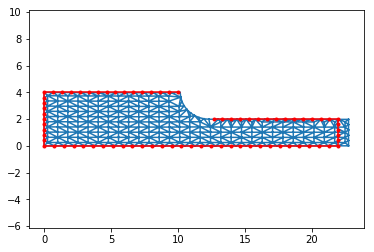

In [59]:
plt.plot(brd[:,0], brd[:,1], '.-r')
plt.triplot(resNodes[:,0], resNodes[:,1], Elems)
plt.axis('equal')

In [60]:
ElemU = U[EFT, np.newaxis]
ElemU.shape

(518, 6, 1)

In [61]:
ElemEps = np.matmul(B, ElemU)
ElemEps.shape

(518, 3, 1)

In [62]:
ElemSig = np.matmul(D, ElemEps)
ElemSig.shape

(518, 3, 1)

(-1.137859460129354, 23.895048662716434, -0.20000000000000012, 4.2)

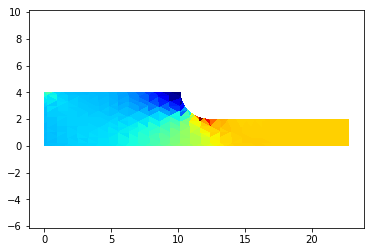

In [63]:
plt.tripcolor(resNodes[:, 0], resNodes[:, 1], Elems, 
              ElemSig[:, 0].ravel(), cmap='jet')
plt.axis('equal')

In [64]:
NodeA = np.zeros((Nn,1))
NodeSig = np.zeros((Nn,3))
for i, e in enumerate(Elems):
    NodeSig[e] += ElemSig[i].T*A[i]
    NodeA[e] += A[i]
NodeSig /= NodeA

(-1.137859460129354, 23.895048662716434, -0.20000000000000012, 4.2)

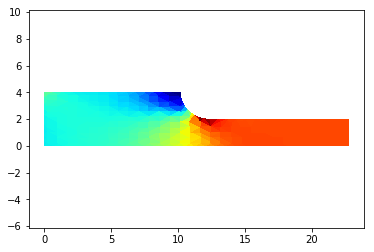

In [65]:
plt.tripcolor(resNodes[:, 0], resNodes[:, 1], Elems, 
              NodeSig[:, 0].ravel(), cmap='jet')
plt.axis('equal')

In [66]:
NodeS1 = 0.5*(NodeSig[:,0]+NodeSig[:,1])+\
         np.sqrt((0.5*(NodeSig[:,0]-NodeSig[:,1]))**2+NodeSig[:,2]**2)

(-1.137859460129354, 23.895048662716434, -0.20000000000000012, 4.2)

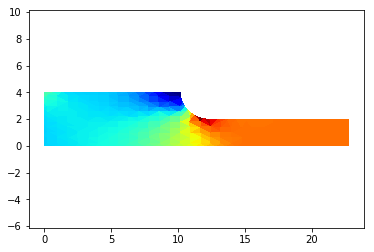

In [67]:
plt.tripcolor(resNodes[:, 0], resNodes[:, 1], Elems, 
              NodeS1.ravel(), cmap='jet')
plt.axis('equal')

In [68]:
i_max = np.argmax(np.abs(NodeS1))
i_max

77

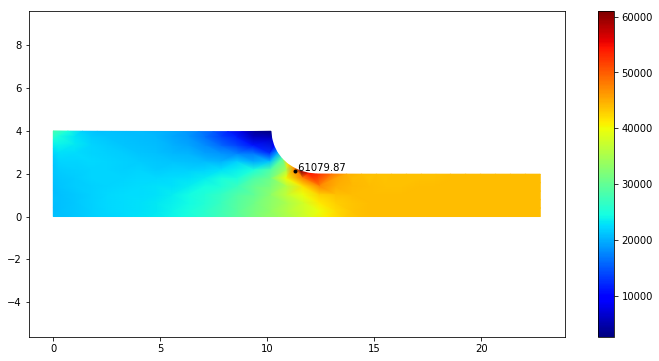

In [69]:
plt.figure(figsize=(12,6))
handle = plt.tripcolor(resNodes[:, 0], resNodes[:, 1], Elems, 
              NodeS1.ravel(), cmap='jet', shading='gouraud')
plt.plot(Nodes[i_max,0], Nodes[i_max,1], '.k')
plt.text(Nodes[i_max,0], Nodes[i_max,1], ' %.2f'%NodeS1[i_max])
plt.axis('equal')
plt.gcf().colorbar(handle)

(0.0, 22.757189202587078, 0.0, 4.0)

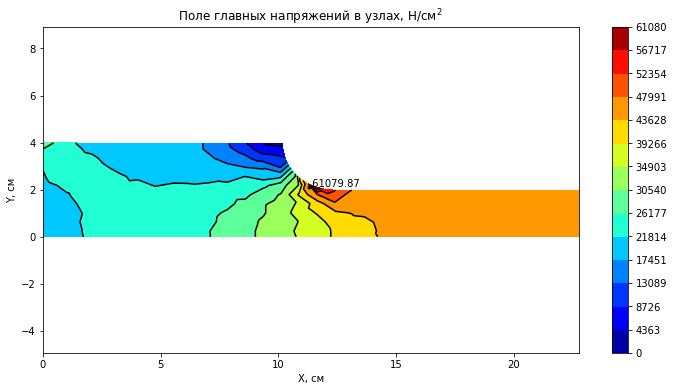

In [70]:
plt.figure(figsize=(12,6))
levels = np.linspace(0, NodeS1[i_max], 15)
handle = plt.tricontourf(resNodes[:, 0], resNodes[:, 1], Elems, 
                         NodeS1.ravel(), cmap='jet',
                         levels=levels)
plt.tricontour(resNodes[:, 0], resNodes[:, 1], Elems, 
              NodeS1.ravel(), colors='k', levels=levels)
plt.plot(Nodes[i_max,0], Nodes[i_max,1], '.k')
plt.text(Nodes[i_max,0], Nodes[i_max,1], ' %.2f'%NodeS1[i_max])
cb = plt.gcf().colorbar(handle)
cb.set_ticks(levels)
plt.title('Поле главных напряжений в узлах, Н/см$^2$')
plt.xlabel('X, см')
plt.ylabel('Y, см')
plt.axis('equal')

In [71]:
# коэффициент концентрации напряжений
NodeS1[i_max]/P

1.388178809381693

## Поиск оптимального решения

In [72]:
import scipy.optimize

In [73]:
# Предположим, что нужно найти значение параметра t, при котором
# функция CalcS1(t) достигает значения S1th

def CalcS1(t):
    return t**1.2*3

S1th = 10

In [74]:
# Первый вариант: оптимизация функции (CalcS1(t)-S1th)**2

scipy.optimize.fminbound(lambda t:(CalcS1(t)-S1th)**2, 
                         1e-5, 1e5, full_output=True)

(2.727297154524399, 2.2491621253537876e-11, 0, 26)

In [75]:
# Второй вариант: поиск корня функции (CalcS1(t)-S1th)

scipy.optimize.root(lambda t:(CalcS1(t)-S1th), 1e5)

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([-2.09965378e-12])
       r: array([-4.39996233])
  status: 1
 success: True
       x: array([2.72729608])